In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file_path =r"C:\Users\Nathan\Documents\WGU\D599\Task 2\Health Insurance Dataset.xlsx"
df = pd.read_excel(file_path)

In [7]:
import seaborn as sns

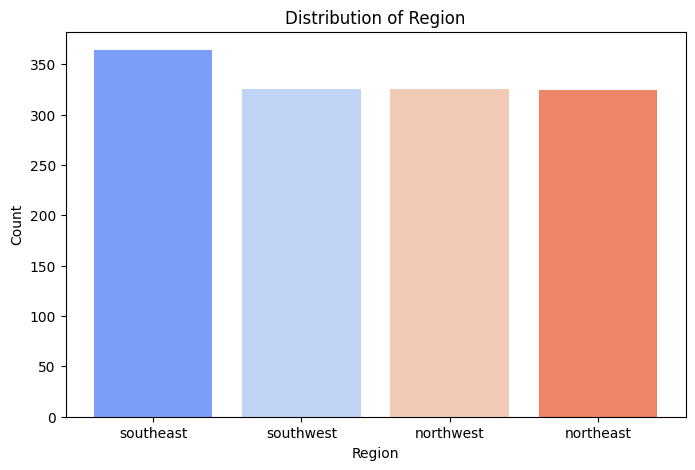

In [4]:
region_counts = df["region"].value_counts()

colors = sns.color_palette("coolwarm", len(region_counts))

plt.figure(figsize=(8, 5))
plt.bar(region_counts.index, region_counts.values, color=colors)

plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Distribution of Region")

plt.show()

In [26]:
region_counts = df["region"].value_counts()
print(region_counts)

region
southeast    364
southwest    325
northwest    325
northeast    324
               1
Name: count, dtype: int64


In [15]:
print(df["region"].unique())

['southwest' 'southeast' 'northwest' 'northeast' nan ' ']


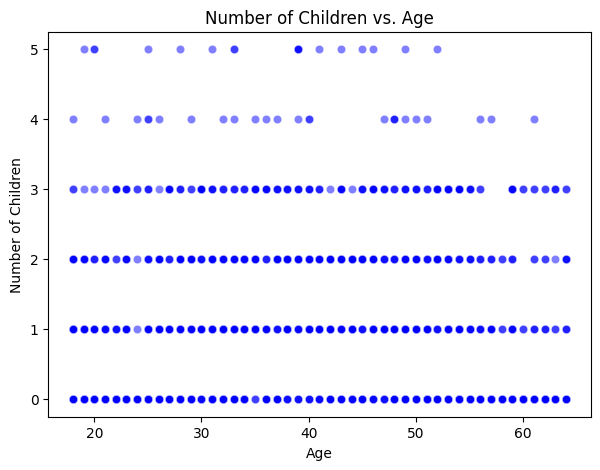

In [24]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["age"], y=df["children"], color="blue", alpha=0.5)

plt.xlabel("Age")
plt.ylabel("Number of Children")
plt.title("Number of Children vs. Age")

plt.show()

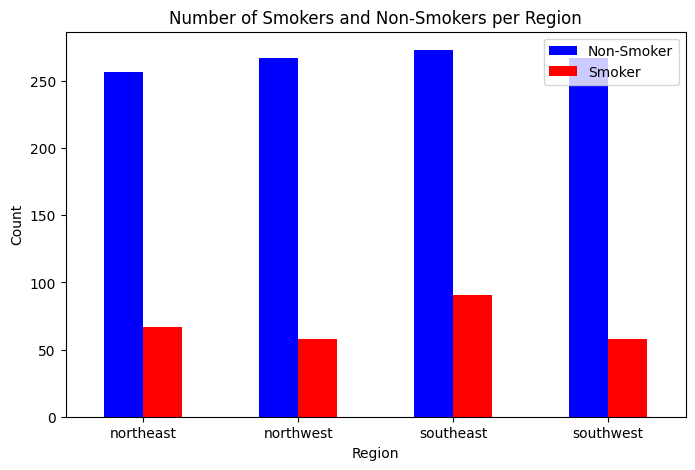

In [33]:
smoker_region_counts = df.groupby(["region", "smoker"]).size().unstack()

smoker_region_counts.plot(kind="bar", figsize=(8, 5), color=["blue", "red"])

plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Number of Smokers and Non-Smokers per Region")
plt.legend(labels=["Non-Smoker", "Smoker"])

plt.xticks(rotation=0)

plt.show()

In [8]:
from scipy.stats import mannwhitneyu

smoker = df[df['smoker'] == 'no']['charges']
non_smoker = df[df['smoker'] == 'yes']['charges']

smoker = pd.to_numeric(smoker, errors='coerce')
non_smoker = pd.to_numeric(non_smoker, errors='coerce')

smoker = smoker.dropna()
non_smoker = non_smoker.dropna()

stat, p_value = mannwhitneyu(smoker, non_smoker)

print('Mann-Whitney U Test Statistic:', stat)
print('P-value:', p_value)

if p_value < 0.05:
    print("Alternative Hypothesis")
else:
    print("Null Hypothesis")

Mann-Whitney U Test Statistic: 7403.0
P-value: 5.270233444503571e-130
Alternative Hypothesis


In [14]:
import scipy.stats as stats

df_clean = df.dropna(subset=["region", "bmi"])

groups = [df_clean["bmi"][df_clean["region"] == category] for category in df_clean["region"].unique()]
anova_result = stats.f_oneway(*groups)

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Alternative Hypothesis")
else:
    print("Null Hypothesis")


ANOVA F-statistic: 39.49505720170283
ANOVA p-value: 1.881838913929143e-24
Alternative Hypothesis
